# HOW TO obtain archival ESO data over the area covered by a GW event

In [1]:
%matplotlib notebook

In [2]:
from ESOAsg.ancillary import astro
from ESOAsg.core import download_archive

## Get credibility contours for a GW event

To begin, you need to have on your disk a `bayestar.fits.gz` maps associated to a GW superevent (see https://journals.aps.org/prd/abstract/10.1103/PhysRevD.93.024013 for more details on `BAYESTAR`). This is necessary to extract the probability contours for the event you would like to explore.

If not, you can download it from https://gracedb.ligo.org/ using:
```python
astro.download_gw_bayestar(super_event_name)
```

Where, for this example: `super_event_name='S191205ah'`

In [3]:
super_event_name = 'S191205ah'
astro.download_gw_bayestar(super_event_name)

[INFO]    :: File S191205ah_bayestar.fits.gz successfully downloaded


True

Now you can extract the contours associated to a given `credible_level`:

In [4]:
credible_level = 50.
contours = astro.contours_from_gw_bayestar(super_event_name+'_bayestar.fits.gz', 
                                           credible_level=credible_level)

[INFO]    :: Extracted the contours for 3 regions at 50.0 credible level


and check the result using:
```python
astro.show_contours_from_gw_bayestar(bayestar_file, contours=contours)
```

<IPython.core.display.Javascript object>


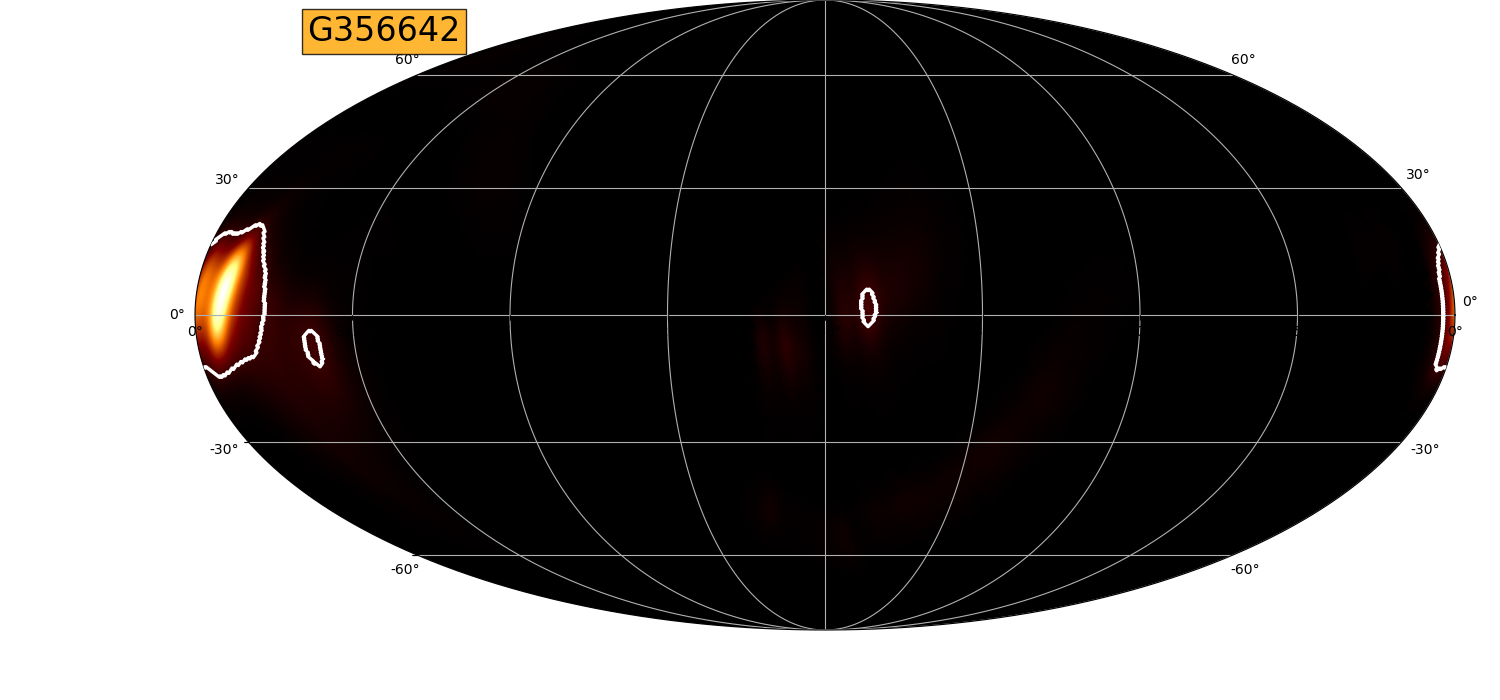

In [5]:
astro.show_contours_from_gw_bayestar(super_event_name+'_bayestar.fits.gz', contours=contours,
                                     cmap='afmhot', contours_color='white', show_figure=True, 
                                     save_figure=super_event_name+'.pdf')

## Query the ESO Archive to collect data withing the contours

Now it is time to run the proper query to the Archive to obtain all data located within the contour regions. To do this you have two options:
* Archive Science Portal: http://archive.eso.org/scienceportal/home
* Programmatic access: http://archive.eso.org/programmatic/
There is, however, one last step before doing this. You need to convert the contours into polygons. This is done with:
```python
download_archive.contours_to_polygons(contours, max_vertices=30)
```
where `max_vertices` is set to avoid crashes due to polygons with too many vertices in the queries.

In [6]:
polygons = download_archive.contours_to_polygons(contours, max_vertices=30)

The resulting `polygons` is a list with N elements (with N matching the number of contours). Each elements contains a string defining the location in the sky of the polygon with RA, Dec, seprated by commas and with the first RA, Dec pair that matches the last one (to close the polygon). For instance:

In [7]:
polygons[1]

'167.8711, -2.5374, 166.9922, -2.0894, 166.1133, -1.3430, 165.9375, -0.5968, 165.7617, 0.1492, 165.5859, 0.8953, 165.4102, 1.6415, 165.2344, 2.3880, 165.7617, 3.1349, 166.2891, 3.8824, 166.4648, 4.6305, 166.6406, 5.3794, 167.5195, 5.8292, 168.3984, 5.6792, 169.2773, 4.9300, 169.4531, 4.1815, 169.6289, 3.4338, 169.8047, 2.6867, 169.6289, 1.9401, 169.4531, 1.1938, 169.2773, 0.4476, 169.1016, -0.2984, 168.9258, -1.0445, 168.7500, -1.7908, 167.8711, -2.5374'

### Archive Science Portal Query:
After running:
```python
download_archive.query_ASP_from_polygons(polygons=polygons, open_link=True)
```
you should see different ASP pages opening in your broswer (one per polygon) pointing to the different regions of the sky you are quering.

In [8]:
download_archive.query_ASP_from_polygons(polygons=polygons, open_link=True)

### Programmatic access:
```python
download_archive.query_TAP_from_polygons(polygons=polygons)
```
returns the result of the query:
```SQL
SELECT
   target_name, dp_id, s_ra, s_dec, t_exptime, em_min, em_max, 
   dataproduct_type, instrument_name, abmaglim, proposal_id
FROM
   ivoa.ObsCore
WHERE
   intersects(s_region, POLYGON('', `polygon`)) = 1
```
for convenince `maxrec` is set to `2` so only the first two results are returned.

In [9]:
results_from_TAP = download_archive.query_TAP_from_polygons(polygons=polygons, 
                                                            merge=False, maxrec=2, 
                                                            verbose=False)

[INFO]    :: Querying the ESO TAP service at:
[INFO]    :: http://archive.eso.org/tap_obs
[INFO]    :: A total of 2 entries has been retrieved for polygon N.0
[INFO]    :: For the following instrument:
[INFO]    ::  - FEROS
[INFO]    ::  - HARPS
[INFO]    :: A total of 2 entries has been retrieved for polygon N.1
[INFO]    :: For the following instrument:
[INFO]    ::  - UVES
[INFO]    :: A total of 2 entries has been retrieved for polygon N.2
[INFO]    :: For the following instrument:
[INFO]    ::  - XSHOOTER


now you can download the data by exploring the `dp_id` of the results: 

In [10]:
download_archive.download(results_from_TAP[0]['dp_id'])

[INFO]    :: Your disk has: Total: 397.03 GB, Used: 397.03 GB, Free: 397.03 GB
[WARNING] :: The content of dp_id is not in a string format.
[WARNING] :: The code is trying to fix this.
[WARNING] :: Converted to <class 'str'>.
[WORKING] :: Downloading file ADP.2016-09-19T01:03:10.998.fits. This may take some time.
[INFO]    :: File ADP.2016-09-19T01:03:10.998.fits downloaded.
[WARNING] :: The content of dp_id is not in a string format.
[WARNING] :: The code is trying to fix this.
[WARNING] :: Converted to <class 'str'>.
[WORKING] :: Downloading file ADP.2016-09-19T11:46:29.074.fits. This may take some time.
[INFO]    :: File ADP.2016-09-19T11:46:29.074.fits downloaded.
